# Ejercicio 1 (2 examen)
#Armendariz Hernandez Andrea

La solución de la ecuación 
$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}$$
sujeta a las condiciones de frontera:
$$u(0,t)=u(1,t)=0, \;\;\; t>0$$
Y la condición inicial:
$$u(x,0)=2x+1,\;\;\;0<x<1$$
Esta dada en términos de la serie de Fourier por la expresión:
$$u(x,t)=\sum_{n=1}^{\infty}(1-(-1)^n3)  \frac{2}{nπ} \sin(nπx)e^-(nπ)^2t.$$

In [25]:
from pylab import *
import matplotlib.pyplot as plt

Graficamos la condicion inicial.

In [26]:
def recta(x):
    y = zeros(len(x))
    for i in range(len(x)):
        y[i] = x[i]
    return y
  

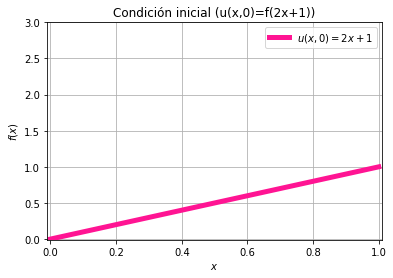

In [27]:
x = linspace(0,1,1000)
f = recta(x)
plt.plot(x,f,label='$u(x,0)=2x+1$',color='deeppink', linewidth=5)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condición inicial (u(x,0)=f(2x+1))")
xlim([-0.01,1.01]),ylim([-0.01,3.0]),grid(),legend()
show()

Usamos una serie de Fourier para aproximar la condición inicial $u(x,0)=f(x)=2x+1$.

In [28]:
def u_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += (1-(-1)**(n)*3.0)*(2.0/(n*pi))*sin(n*pi*x)
    return f

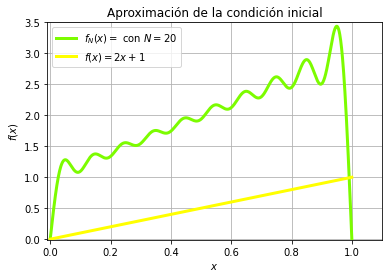

In [29]:
f_n = u_0(x)
plt.plot(x,f_n,label='$f_N(x)=$ con $N=20$',color='lawngreen', linewidth=3 )
plt.plot(x,f,label='$f(x)=2x+1$', color='yellow', linewidth=3)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-0.01,3.5]),grid(),legend()
show()

Hacemos la aproximacion con diferentes armonicos

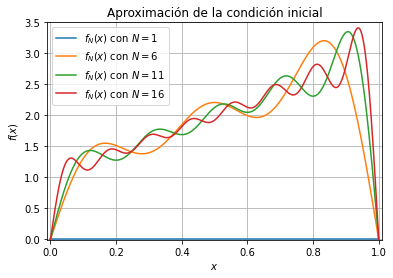

In [30]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,3.5]),grid(),legend()
show()

Tomamos para el momento inicial, $t=0$.

In [31]:
def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += (1-(-1)**(n)*3.0)*(2.0/(n*pi))*sin(n*pi*x)*exp(-n**2*pi**2*t[i])
    return f

In [32]:
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)

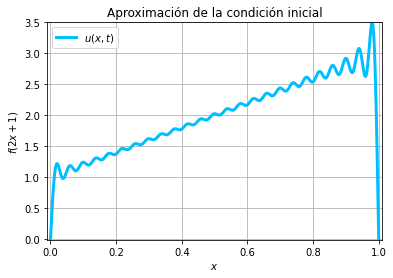

In [33]:
plt.plot(x,U[:,0],label='$u(x,t)$',color='deepskyblue', linewidth=3)
plt.xlabel('$x$'); plt.ylabel('$f(2x+1)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,3.5]),grid(),legend()
show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t \to \infty$.

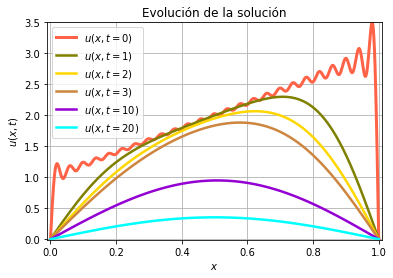

In [34]:
plt.plot(x,U[:,0],label='$u(x,t=0)$',color='tomato', linewidth=3) # Mejorar
plt.plot(x,U[:,1],label='$u(x,t=1)$', color='olive', linewidth=2.5)
plt.plot(x,U[:,2],label='$u(x,t=2)$', color='gold', linewidth=2.5)
plt.plot(x,U[:,3],label='$u(x,t=3)$', color='peru', linewidth=2.5)
plt.plot(x,U[:,10],label='$u(x,t=10)$', color='darkviolet', linewidth=2.5)
plt.plot(x,U[:,20],label='$u(x,t=20)$', color='cyan', linewidth=2.5)
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-0.01,3.5]),grid(),legend()
show()

Graficamos en 3D

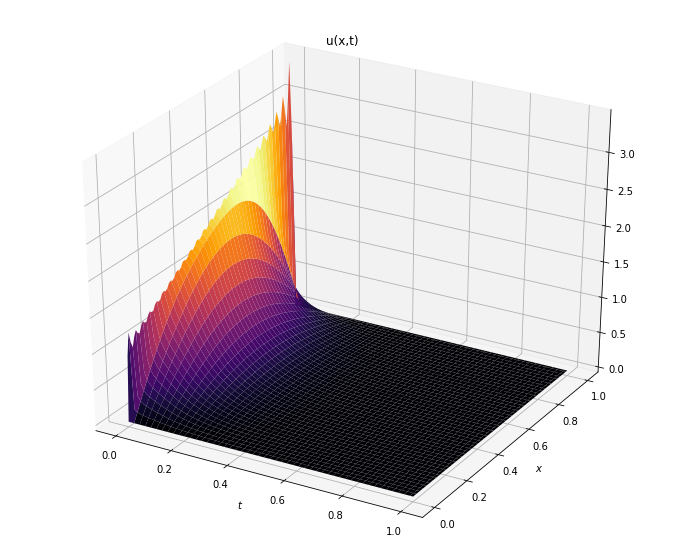

In [35]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$'); 
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="inferno"); #Otros colores:"viridis", "inferno", "plasma"